In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from statsmodels.api import OLS,add_constant
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('cleaned_data_')
data.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white,al
1,28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue,al
2,29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red,al
3,30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red,al
4,31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326321 entries, 0 to 326320
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    326321 non-null  int64  
 1   region        326321 non-null  object 
 2   price         326321 non-null  int64  
 3   year          326321 non-null  float64
 4   manufacturer  326321 non-null  object 
 5   model         326321 non-null  object 
 6   condition     326321 non-null  object 
 7   cylinders     326321 non-null  object 
 8   fuel          326321 non-null  object 
 9   odometer      326321 non-null  float64
 10  title_status  326321 non-null  object 
 11  transmission  326321 non-null  object 
 12  drive         326321 non-null  object 
 13  type          326321 non-null  object 
 14  paint_color   326321 non-null  object 
 15  state         326321 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 39.8+ MB


In [ ]:
data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data.price.max()

In [ ]:
data.describe()

In [ ]:
for i in data.select_dtypes(exclude=np.number).columns:
    result=data.groupby(by=i)["price"].apply(list)
    x,pval=stats.f_oneway(*result)
    print("for",i,"pval is",pval)

In [ ]:
for i in data.select_dtypes(include=np.number).columns:
    x,pval=stats.pearsonr(data[i],data["price"])
    print("for",i,"pval is",pval)

based on statistical and domain knowledege given by a domain expert we are removing the following columns region,model,color

In [5]:
df=data.drop(columns=["region","model",'paint_color'],axis=1)

In [6]:
type_drop=[i for i in df[df.type=="bus"].index]

In [7]:
df.drop(index=type_drop,axis=0,inplace=True)

In [8]:
price_drop_list=df[df.price<5000].index

In [9]:
df.drop(index=price_drop_list,axis=0,inplace=True)

EDA

univarient analysis

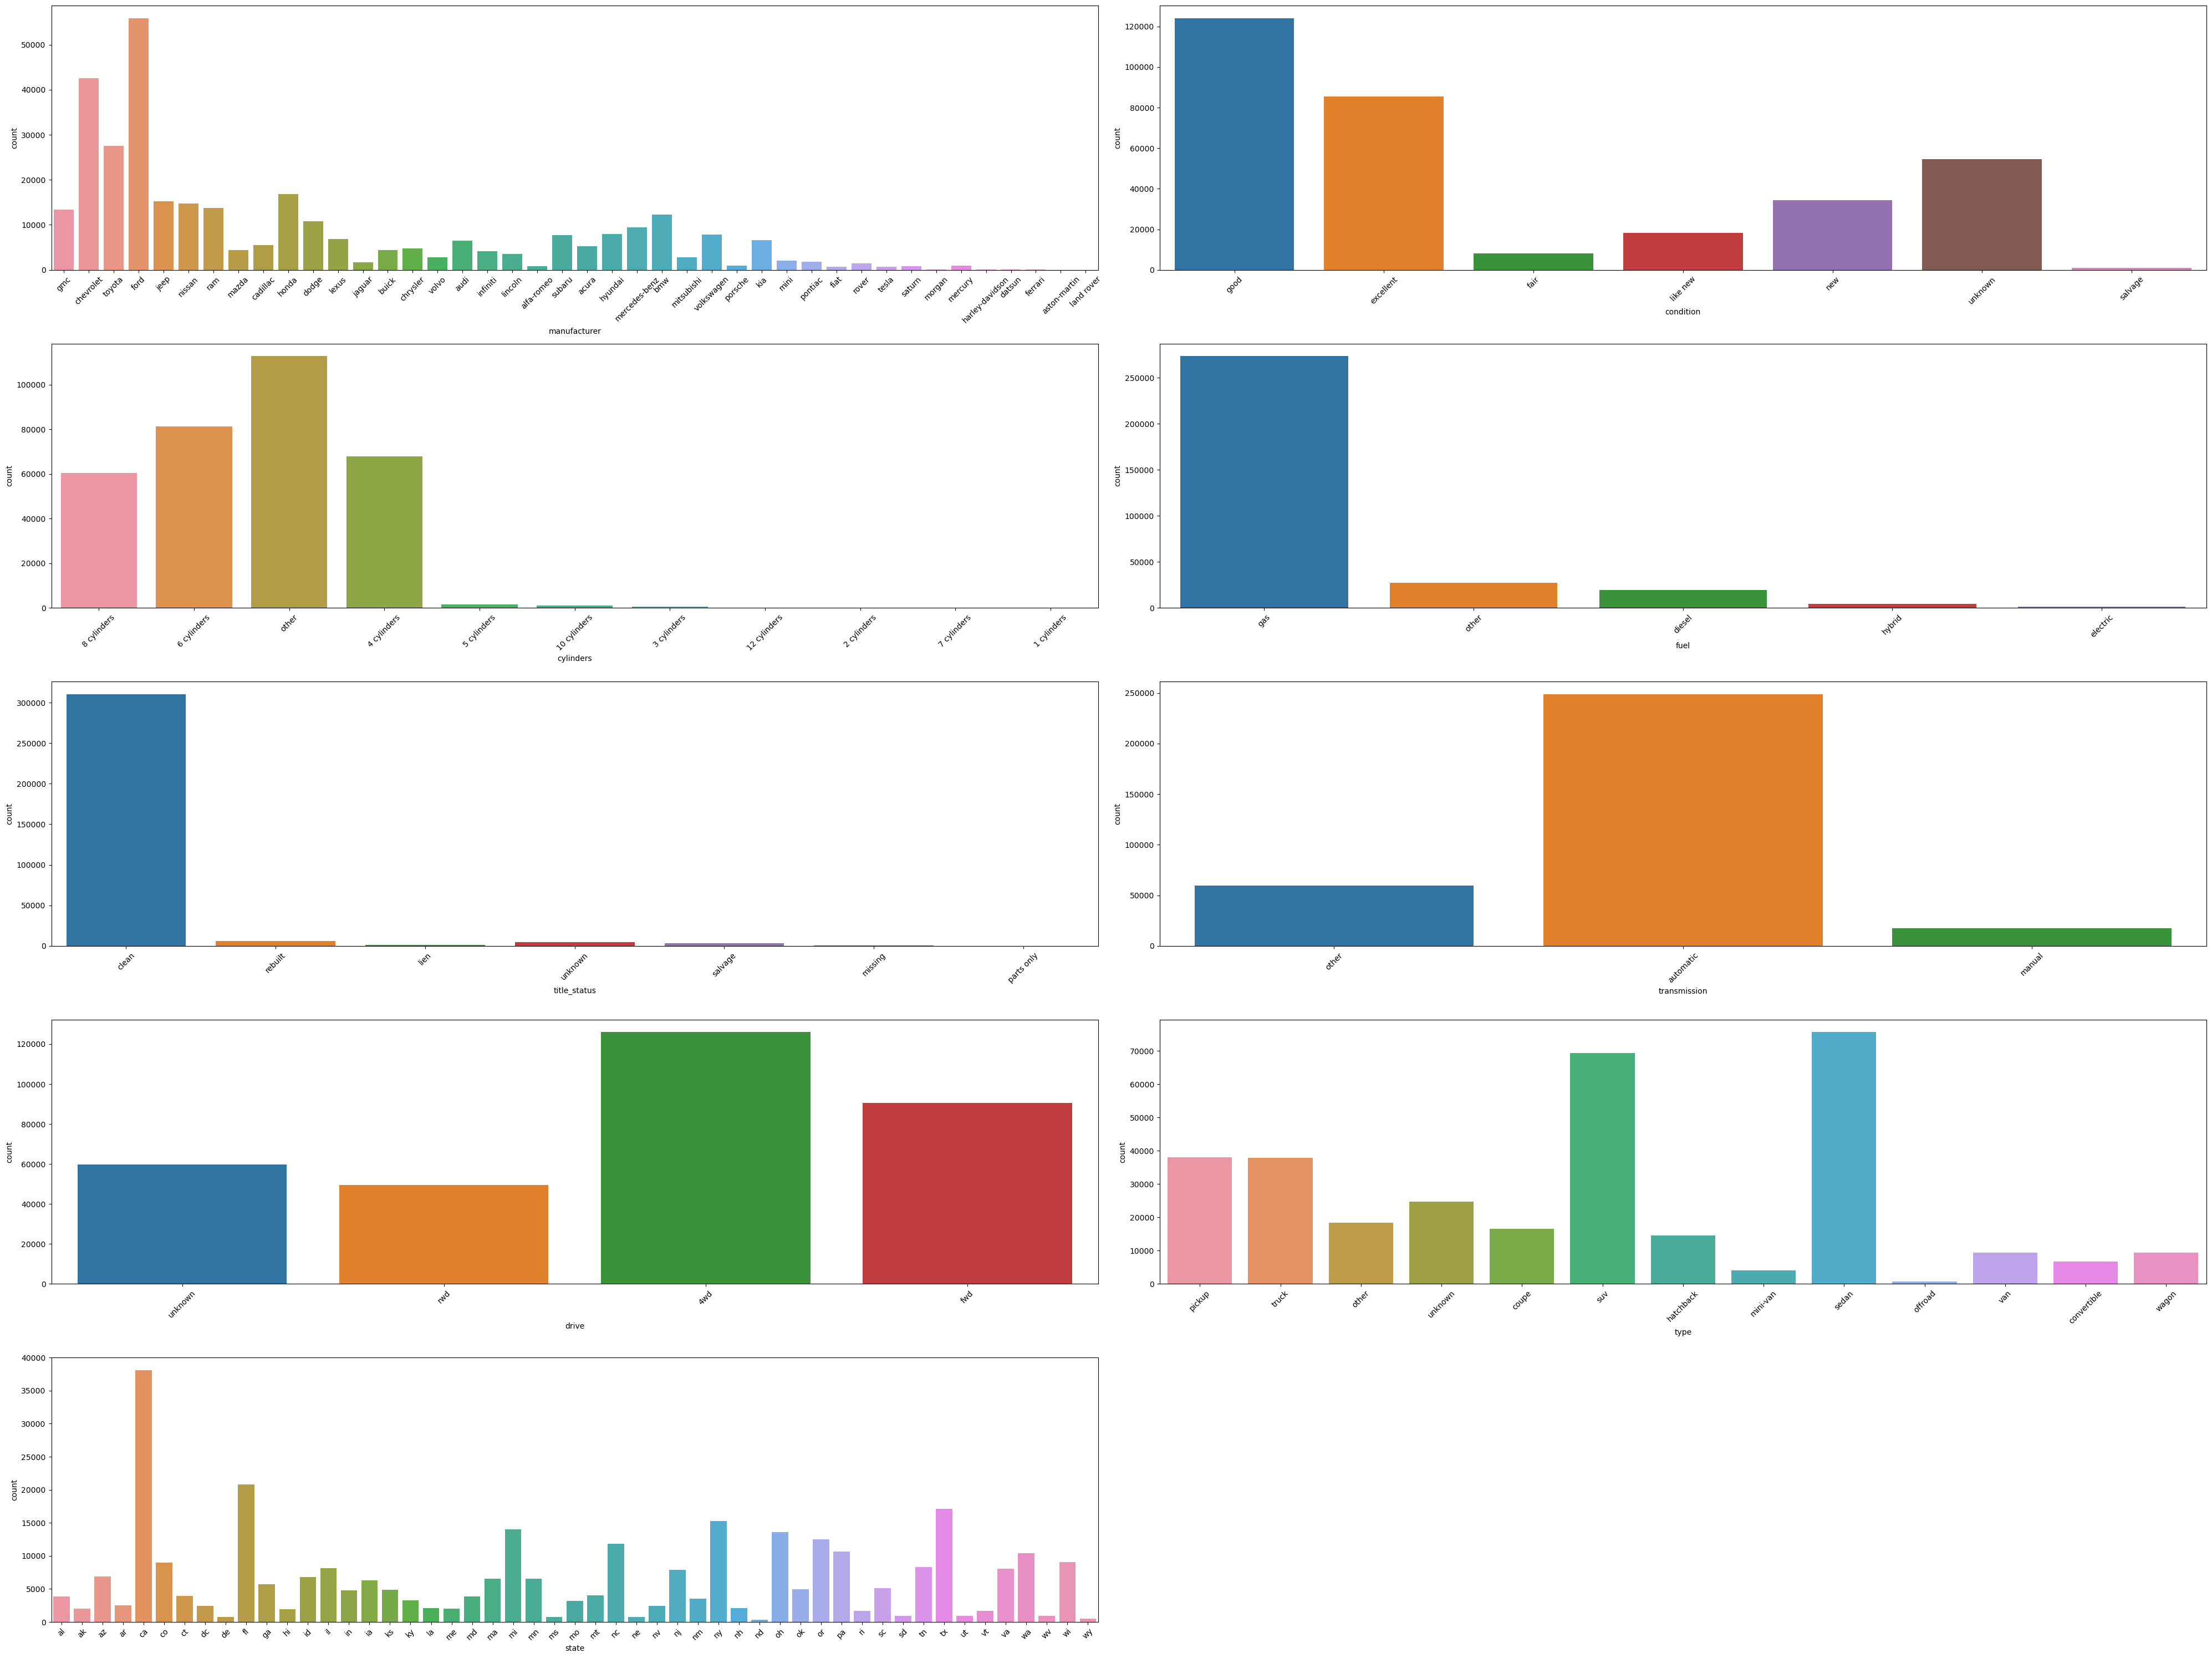

In [62]:
nrows = 5
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(nrows,ncols,iterator)  
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    iterator+=1  
plt.tight_layout()
plt.show()

In [10]:
df.type.replace(to_replace=["pickup","offroad","coupe","hatchback",'mini-van','van','convertible','wagon'],value=["truck",'suv','other','other','other','other','other','other'],inplace=True)

In [130]:
df_manu=(df.manufacturer.value_counts(normalize=True)*100).to_frame()

In [138]:
df.title_status.value_counts(normalize=True)*100

clean         95.286187
rebuilt        1.786251
unknown        1.470688
salvage        0.927967
lien           0.368670
missing        0.125857
parts only     0.034381
Name: title_status, dtype: float64

In [139]:
df.title_status.unique()

array(['clean', 'rebuilt', 'lien', 'unknown', 'salvage', 'missing',
       'parts only'], dtype=object)

In [11]:
df.title_status.replace(to_replace=['rebuilt', 'lien', 'unknown', 'salvage', 'missing','parts only'],value=["others","others","others","others","others","others"],inplace=True)

<AxesSubplot:xlabel='type', ylabel='count'>

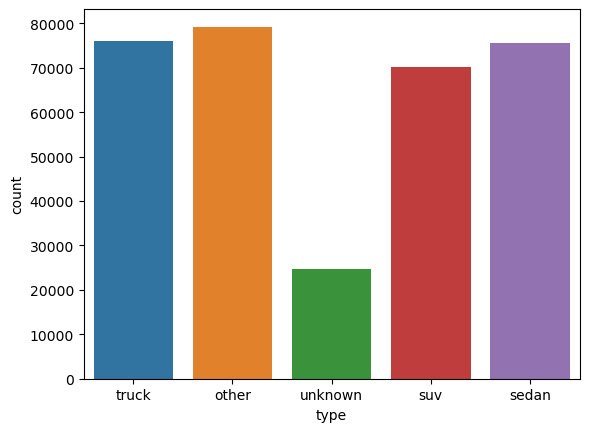

In [64]:
sns.countplot(df.type)

In [65]:
df.type.unique()

array(['truck', 'other', 'unknown', 'suv', 'sedan'], dtype=object)

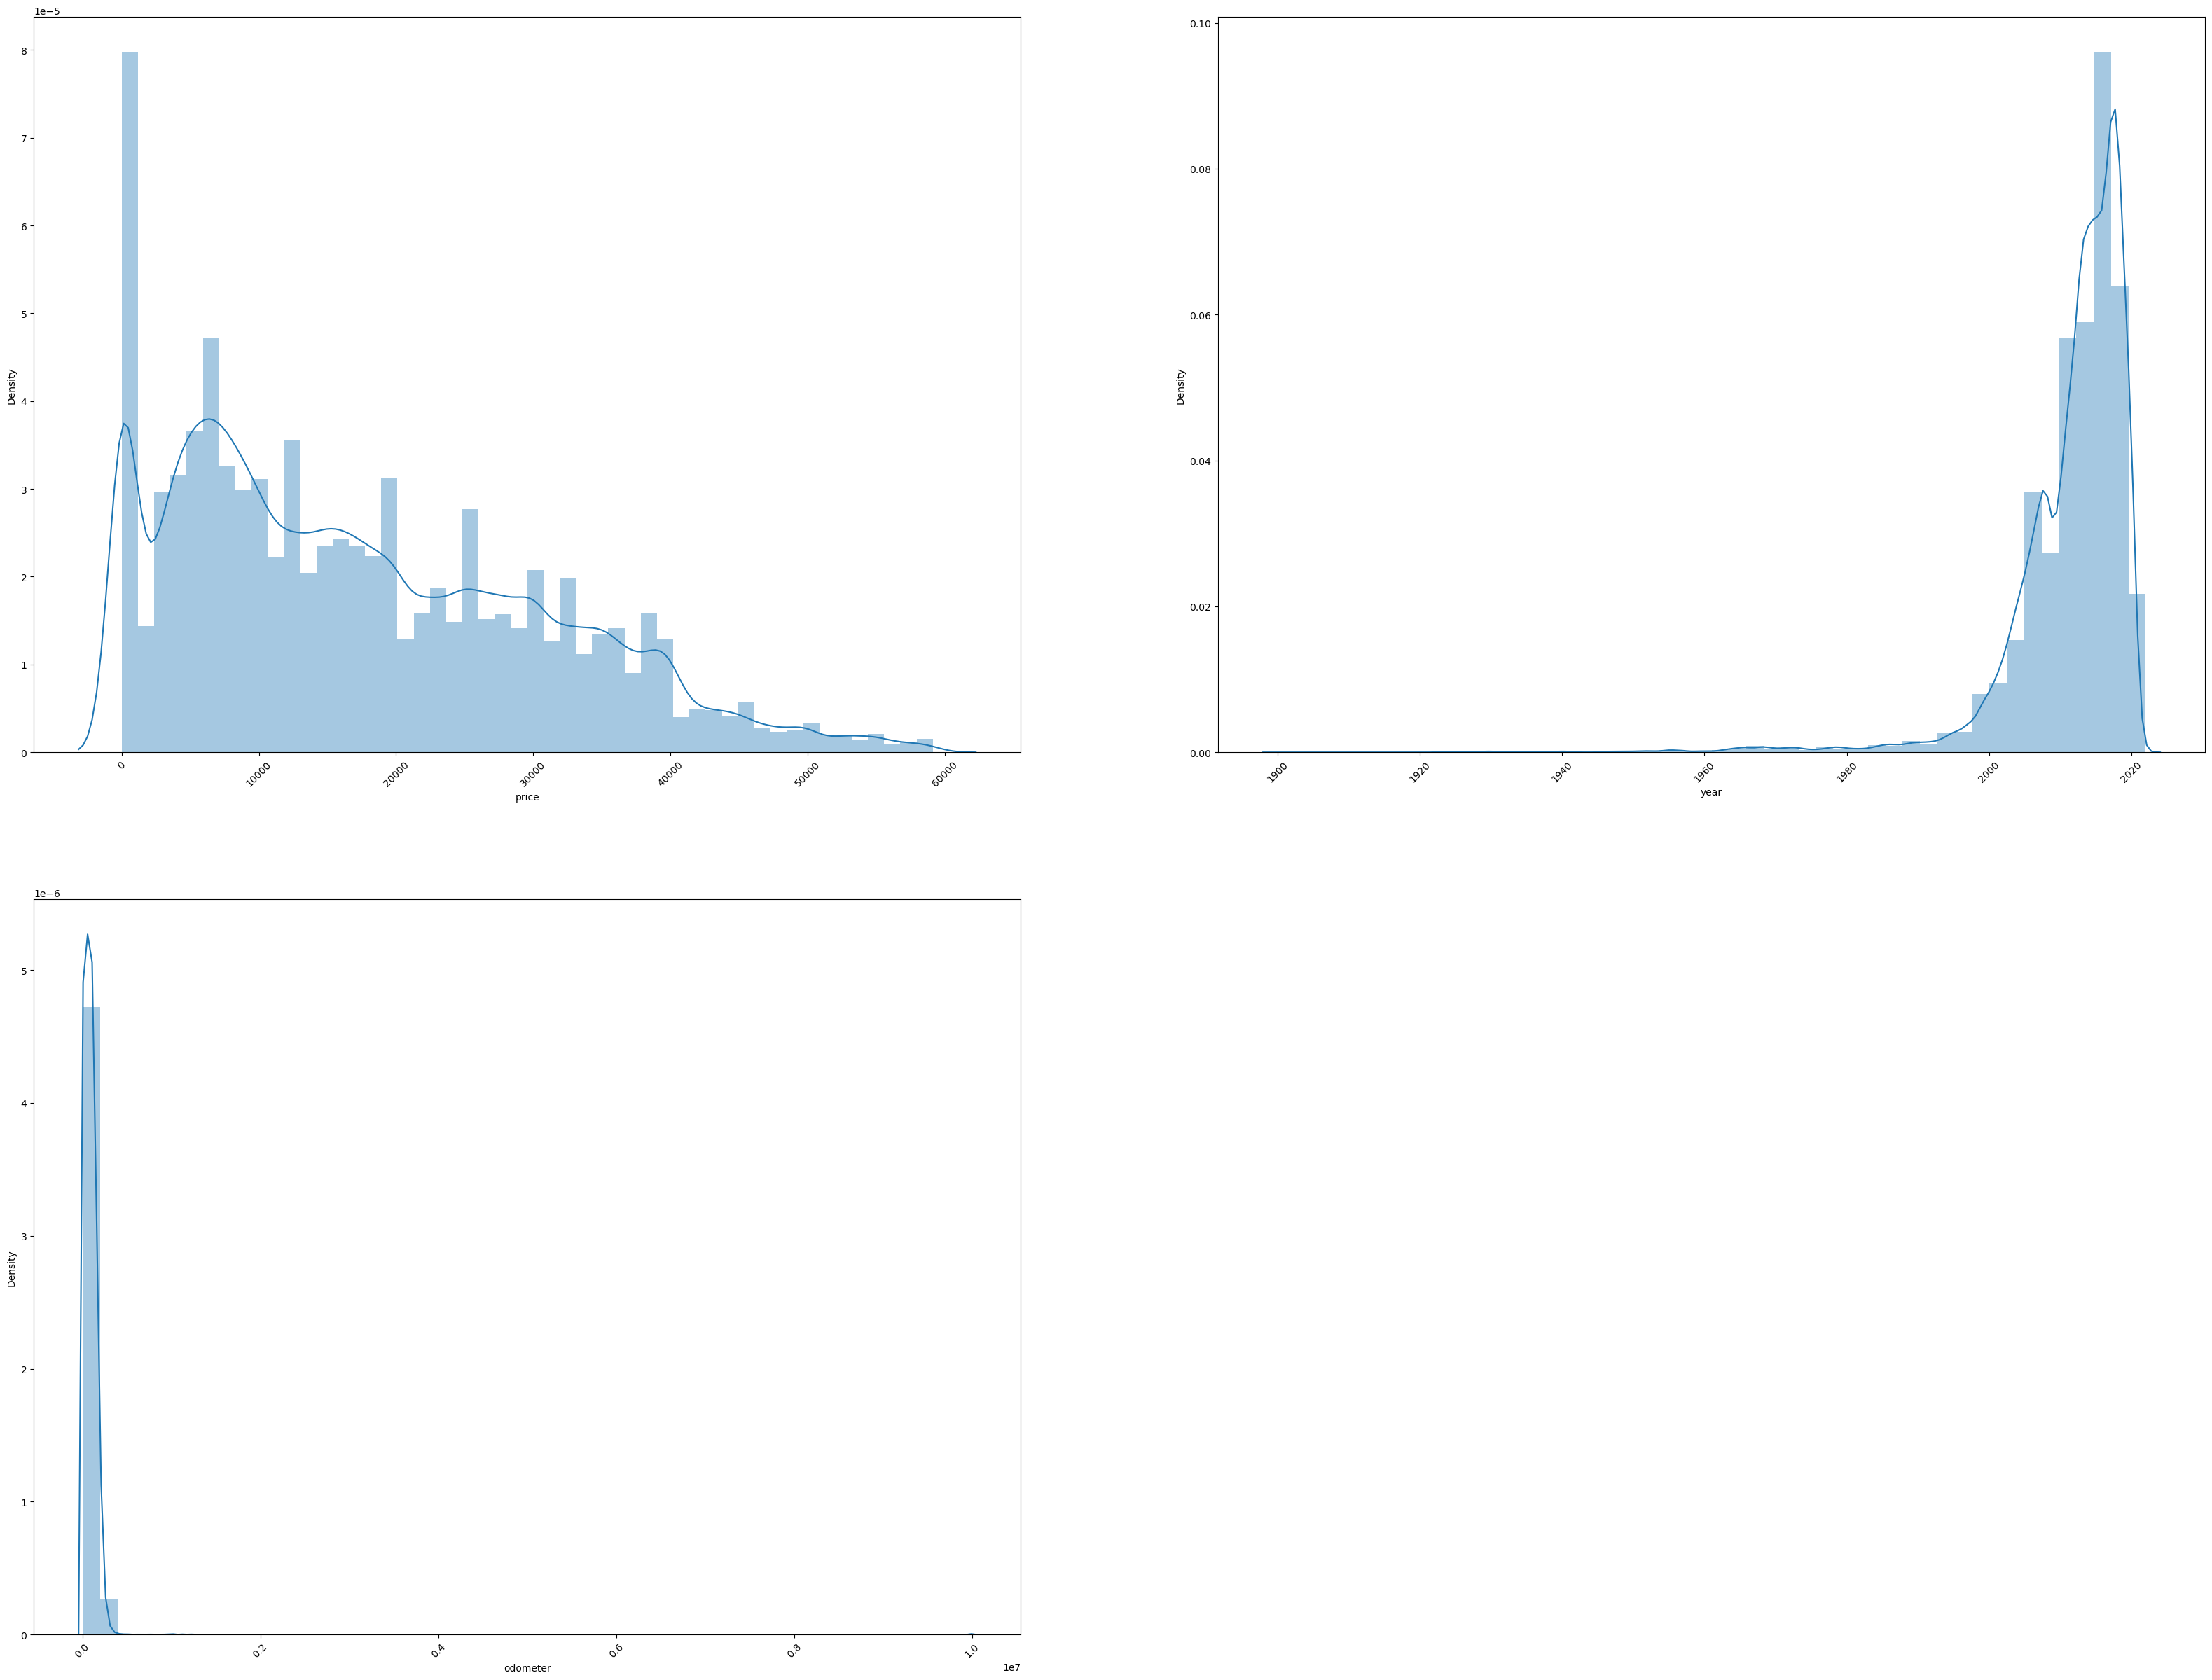

In [141]:
nrows = 2
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(nrows,ncols,iterator)  
    sns.distplot(df[i])
    plt.xticks(rotation=45)
    iterator+=1  

plt.show()

BIVARIENT ANALYSIS

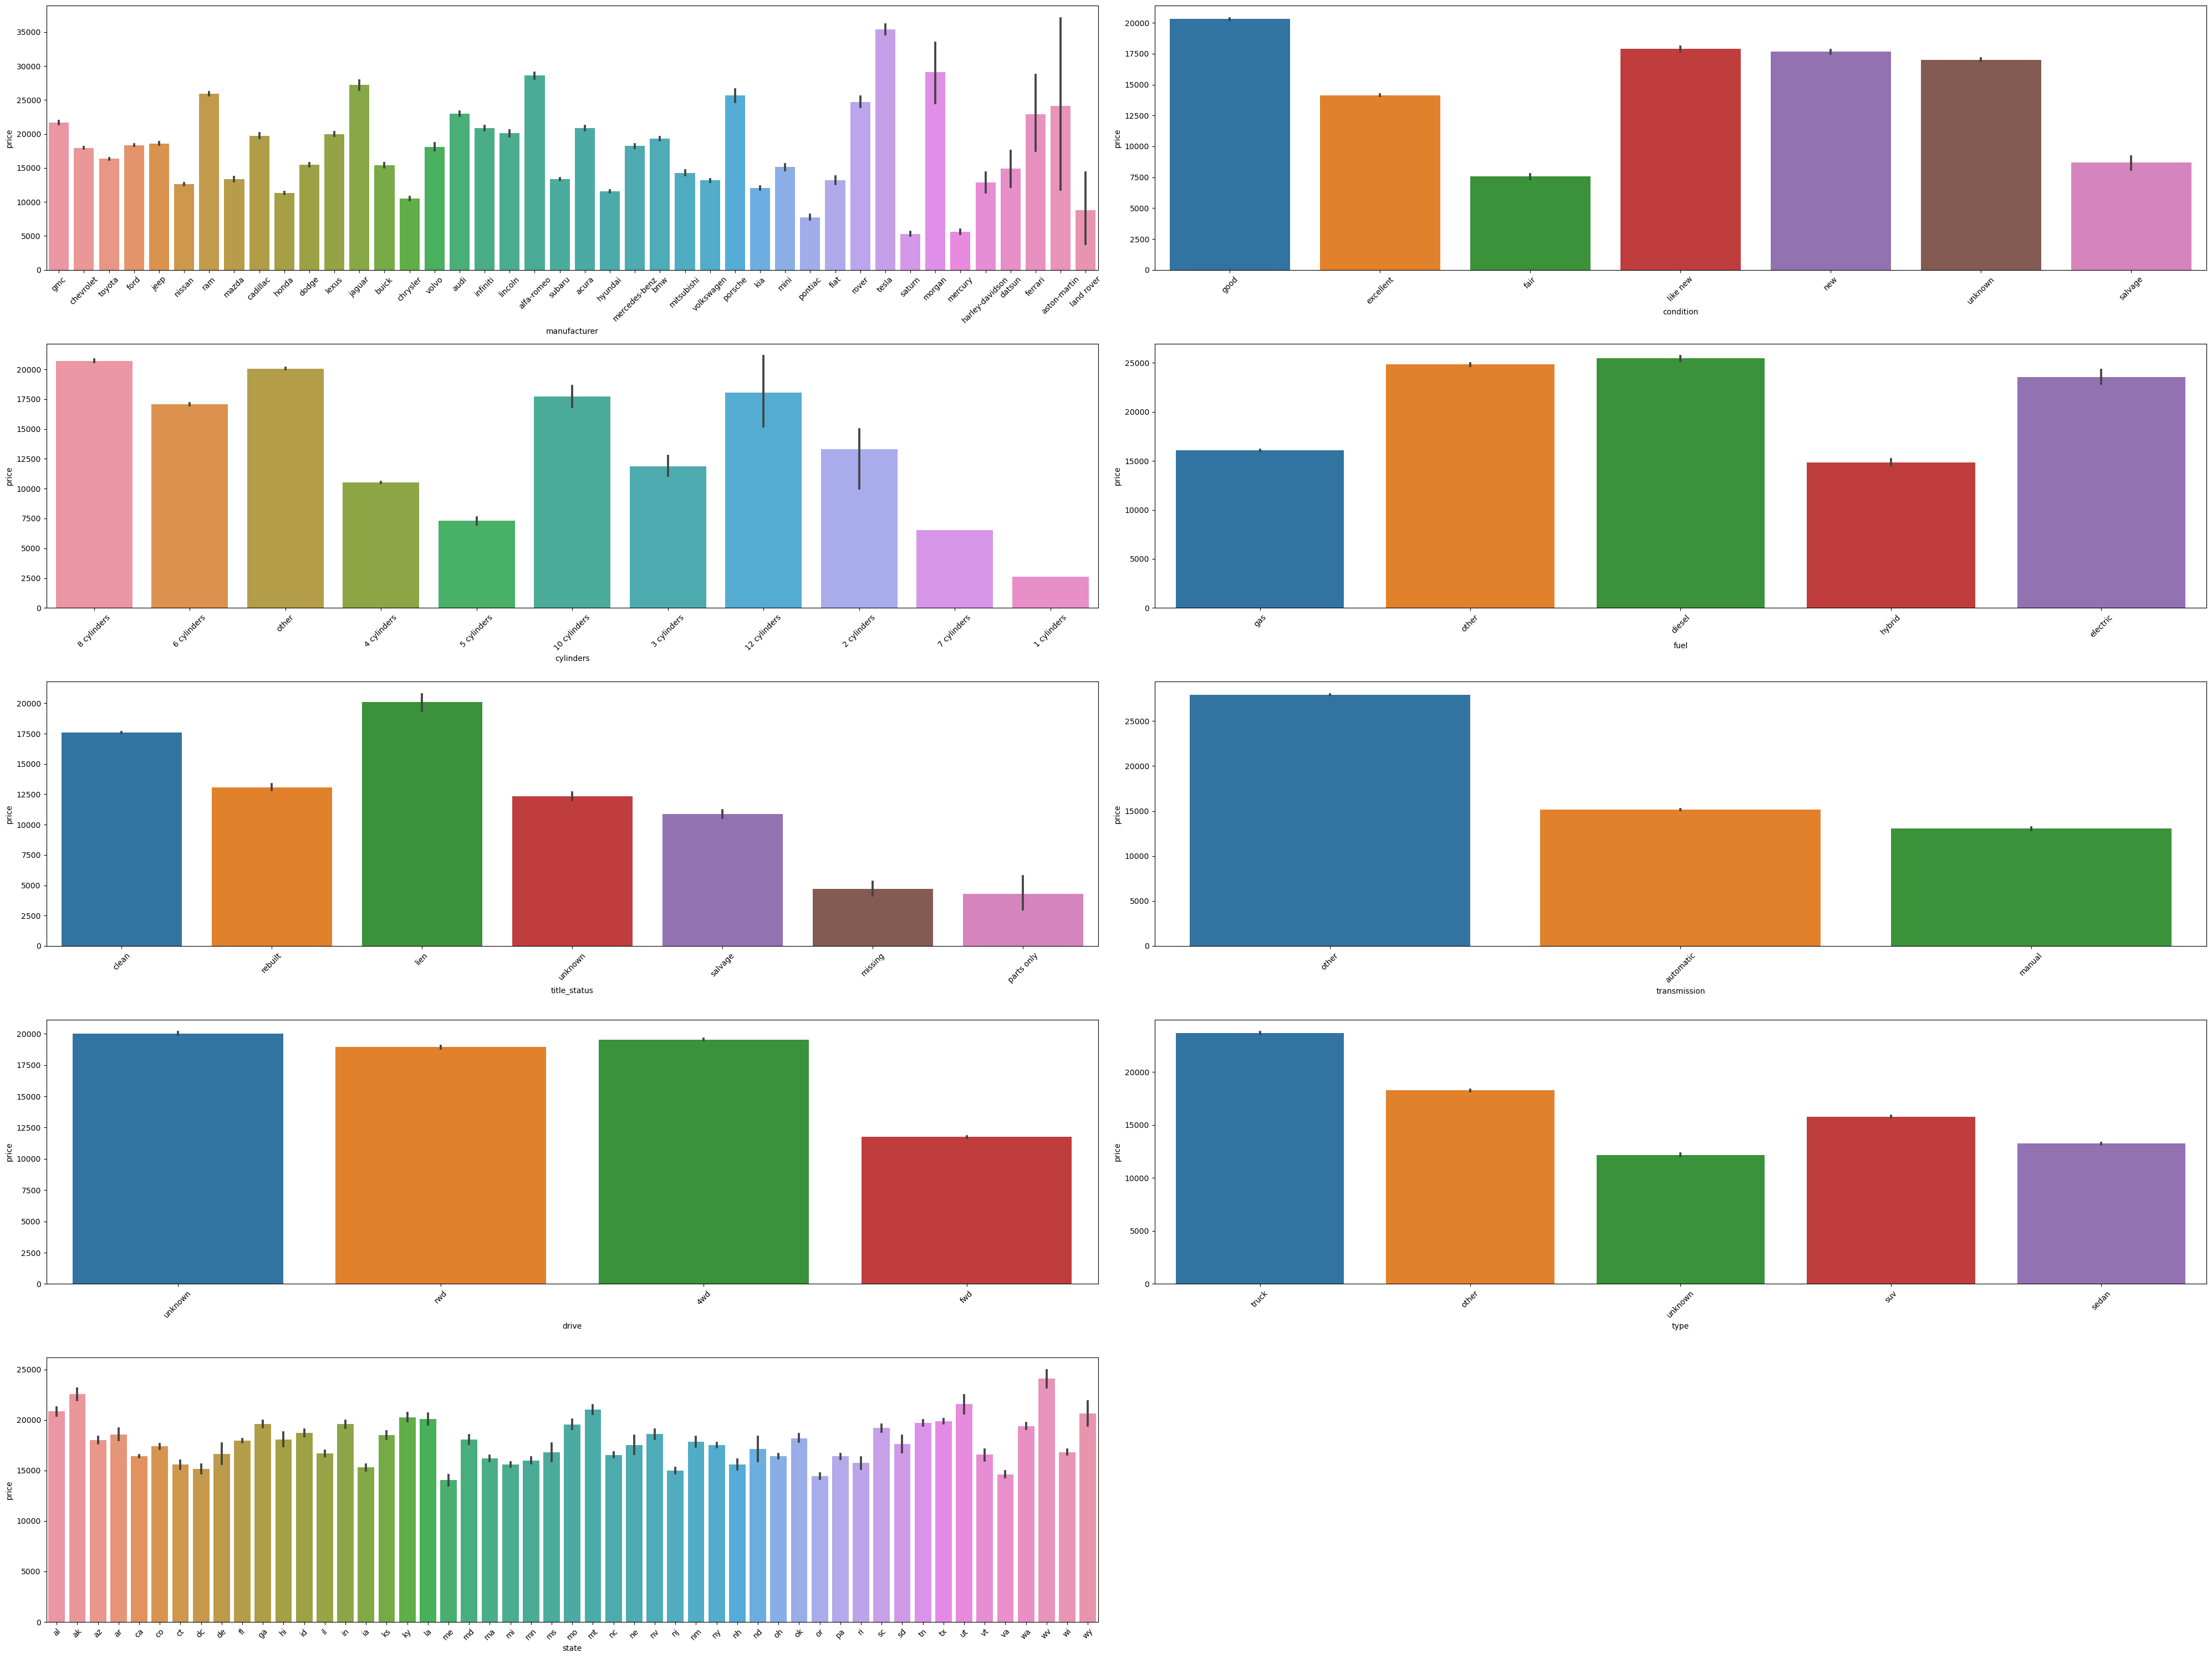

In [67]:
nrows = 5
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(nrows,ncols,iterator) 
    sns.barplot(x=df[i],y=df["price"])
    plt.xticks(rotation=45)
    iterator+=1  
plt.tight_layout()
plt.show()

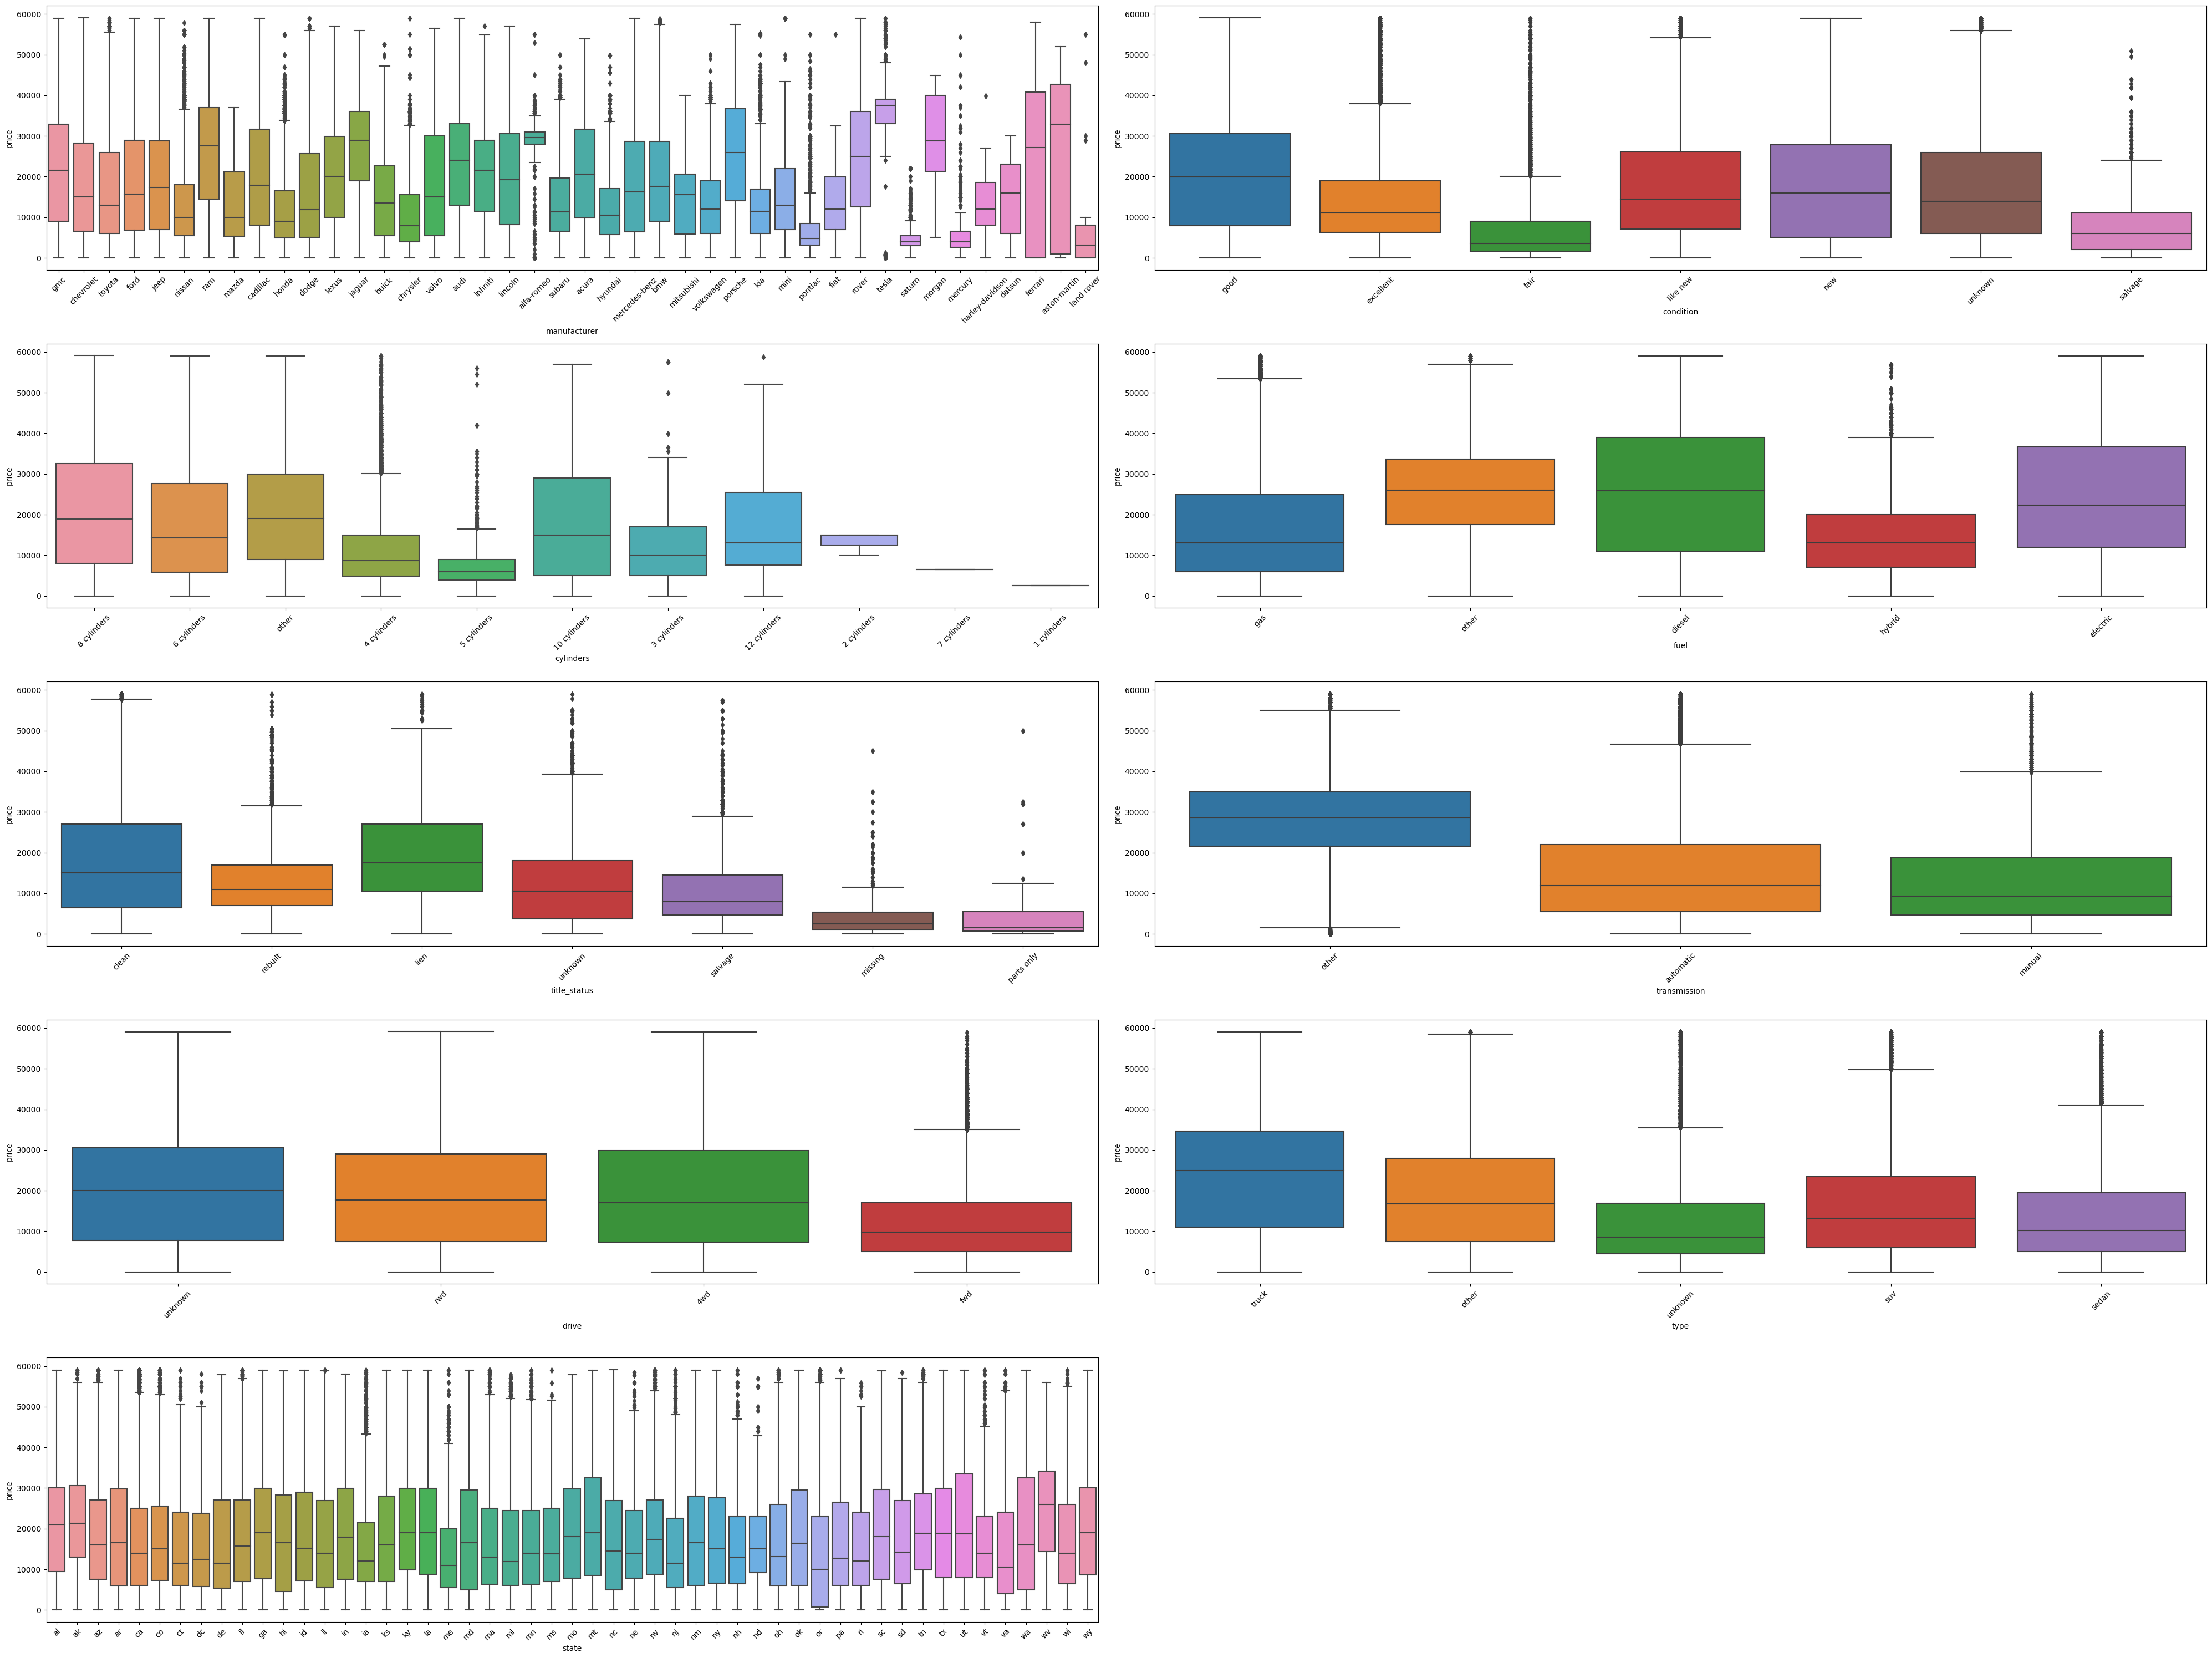

In [68]:
nrows = 5
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(nrows,ncols,iterator) 
    sns.boxplot(x=df[i],y=df["price"])
    plt.xticks(rotation=45)
    iterator+=1  
plt.tight_layout()
plt.show()

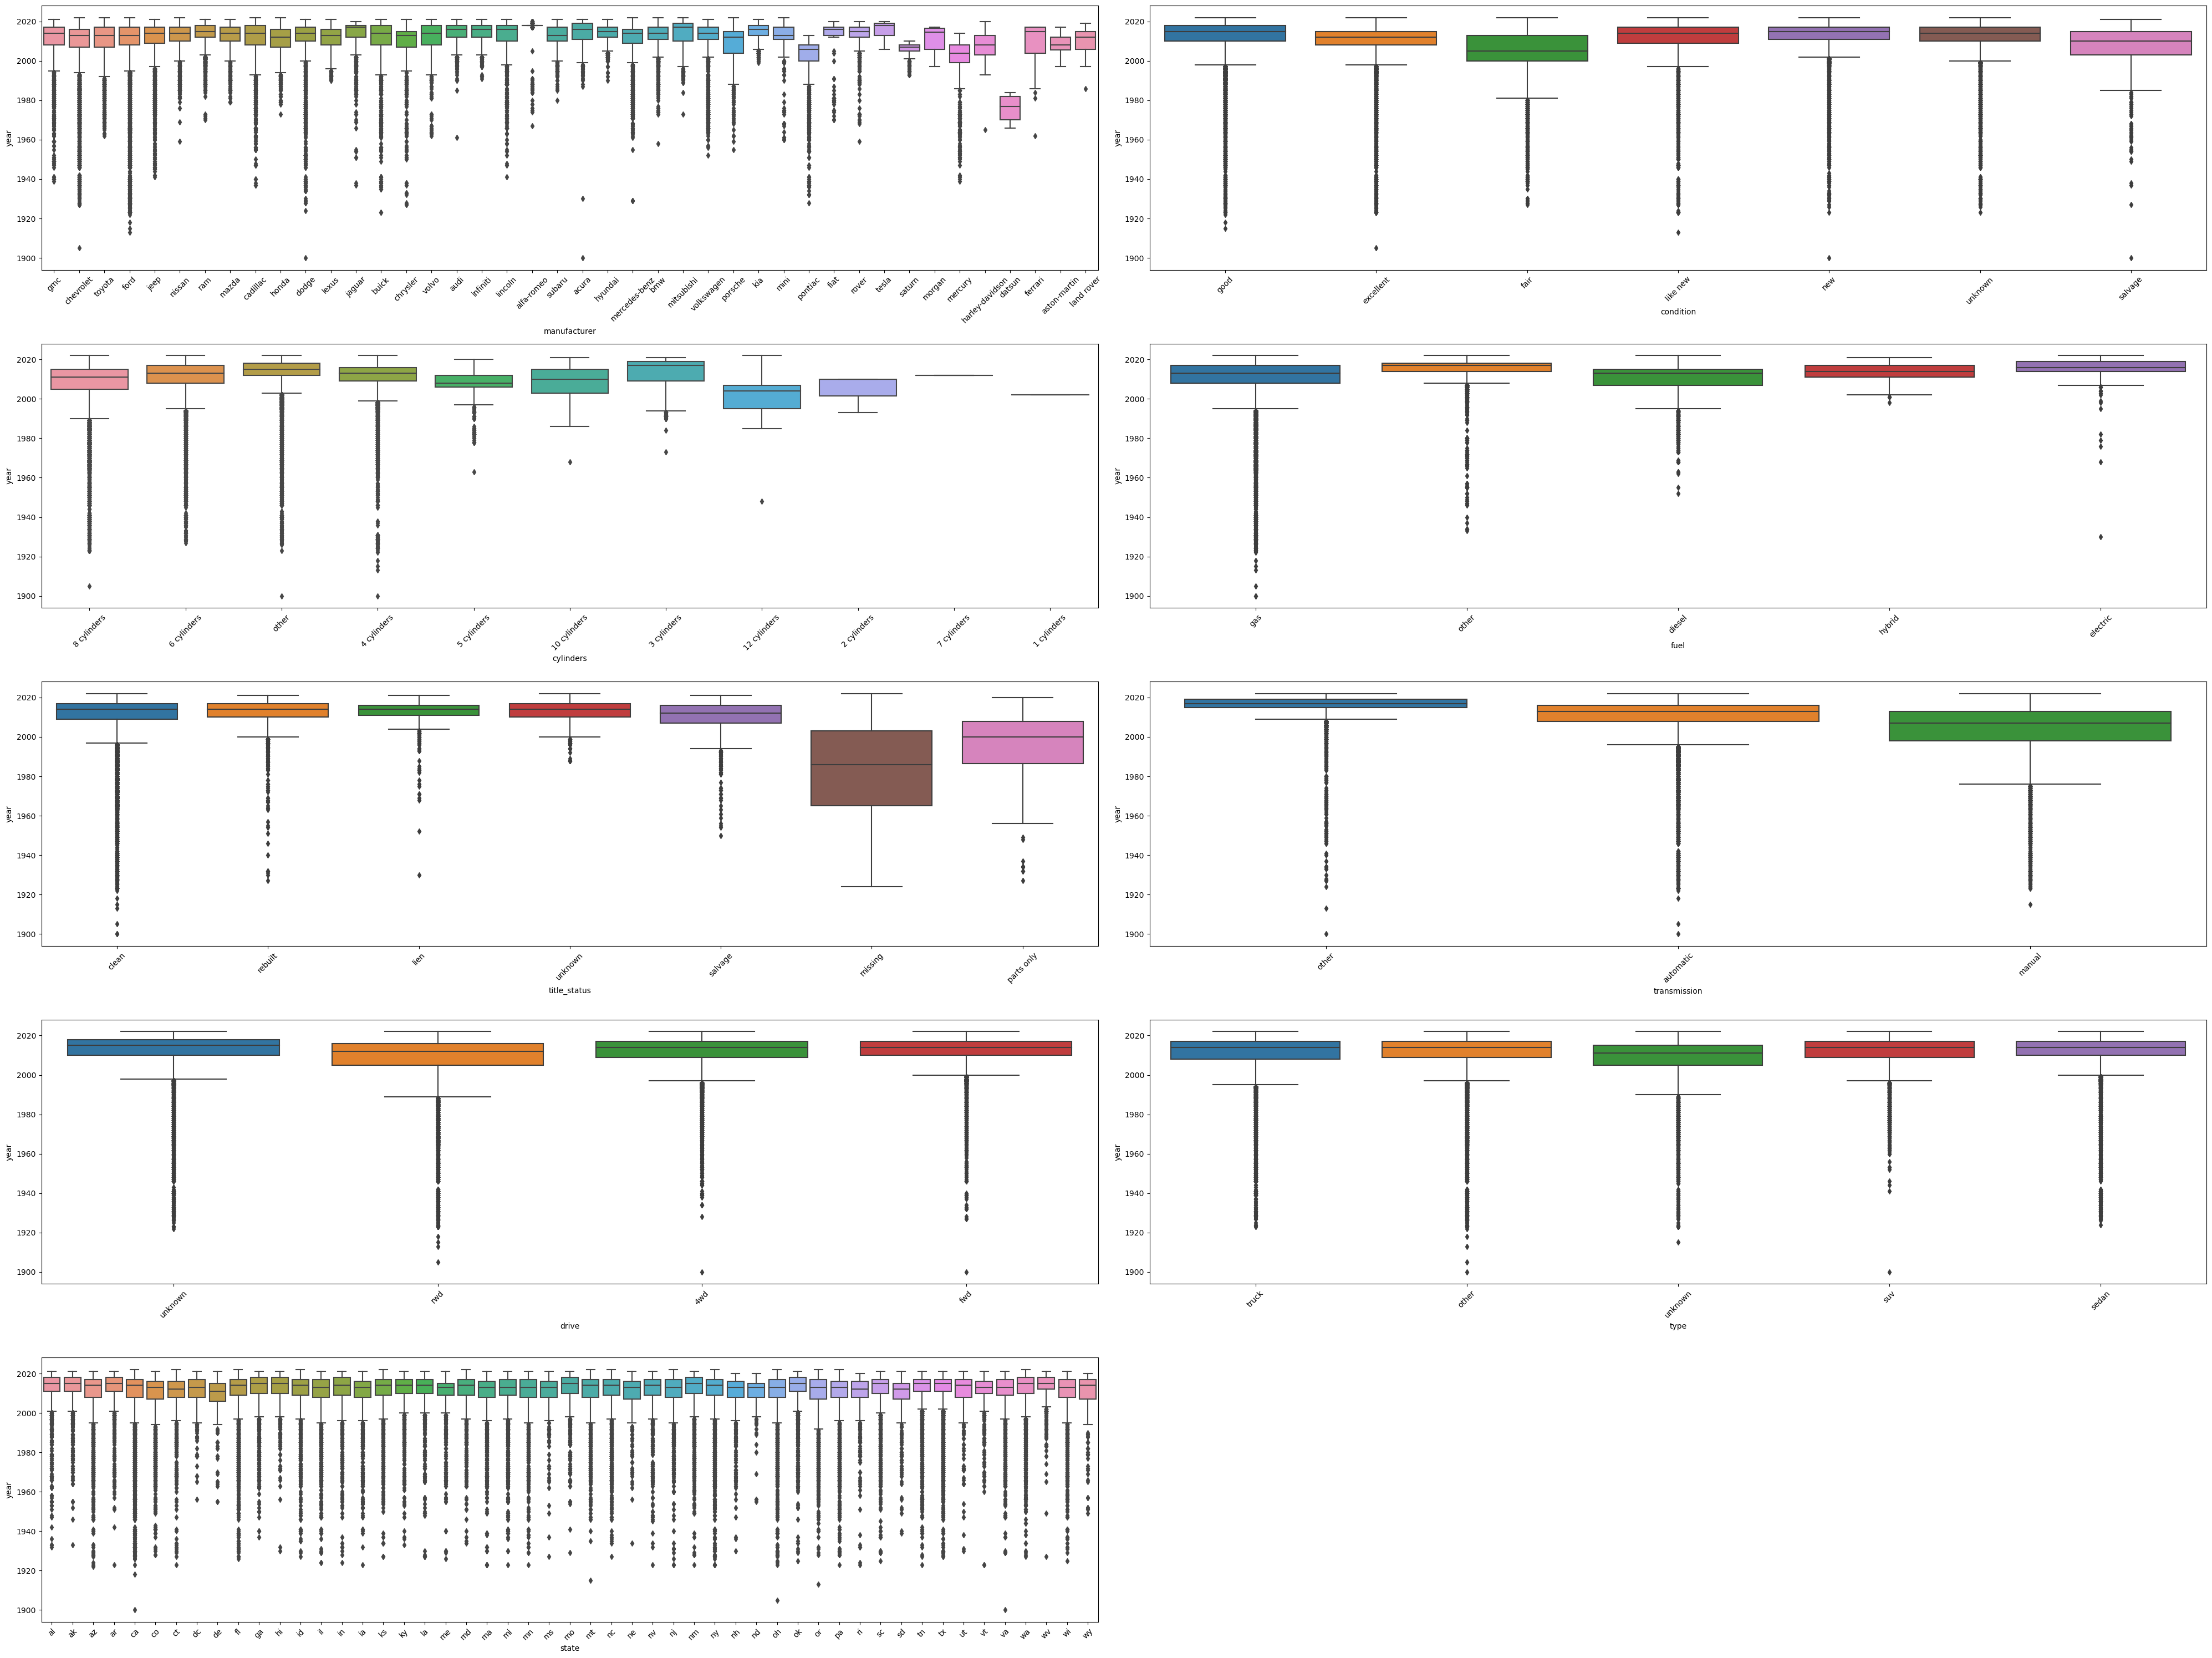

In [69]:
nrows = 5
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(nrows,ncols,iterator) 
    sns.boxplot(x=df[i],y=df["year"])
    plt.xticks(rotation=45)
    iterator+=1  
plt.tight_layout()
plt.show()

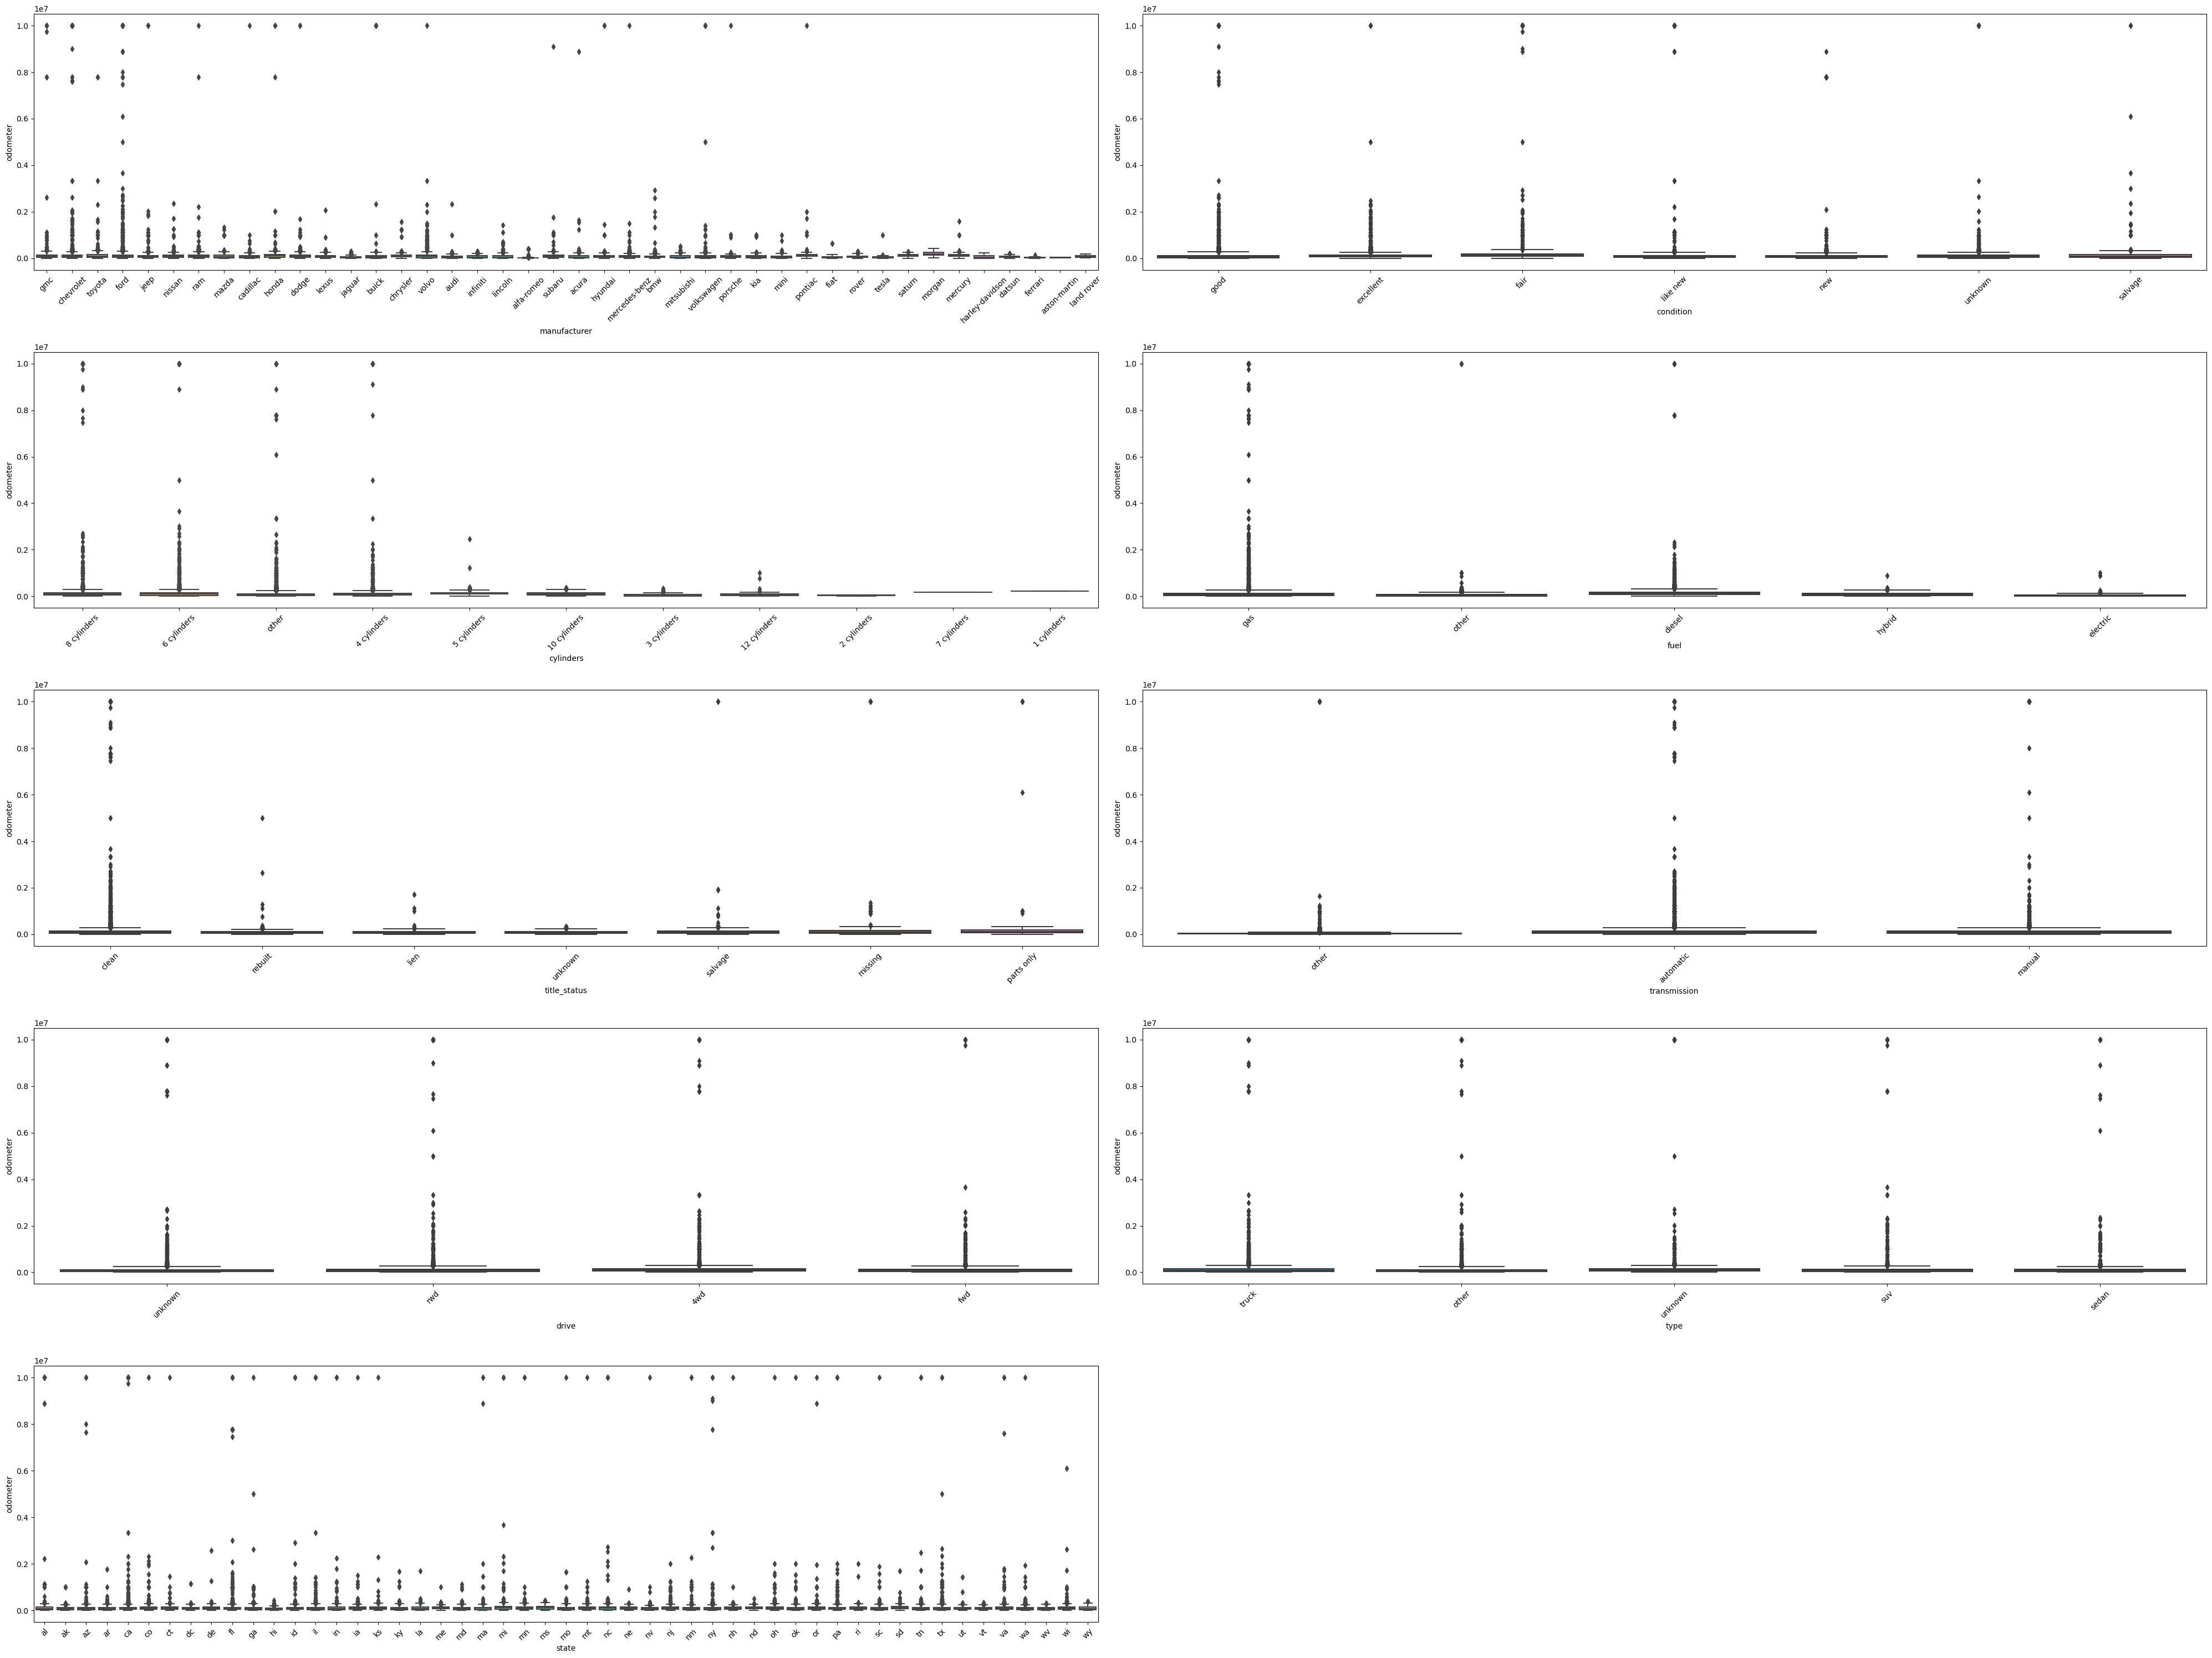

In [70]:
nrows = 5
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(nrows,ncols,iterator) 
    sns.boxplot(x=df[i],y=df["odometer"])
    plt.xticks(rotation=45)
    iterator+=1  
plt.tight_layout()
plt.show()

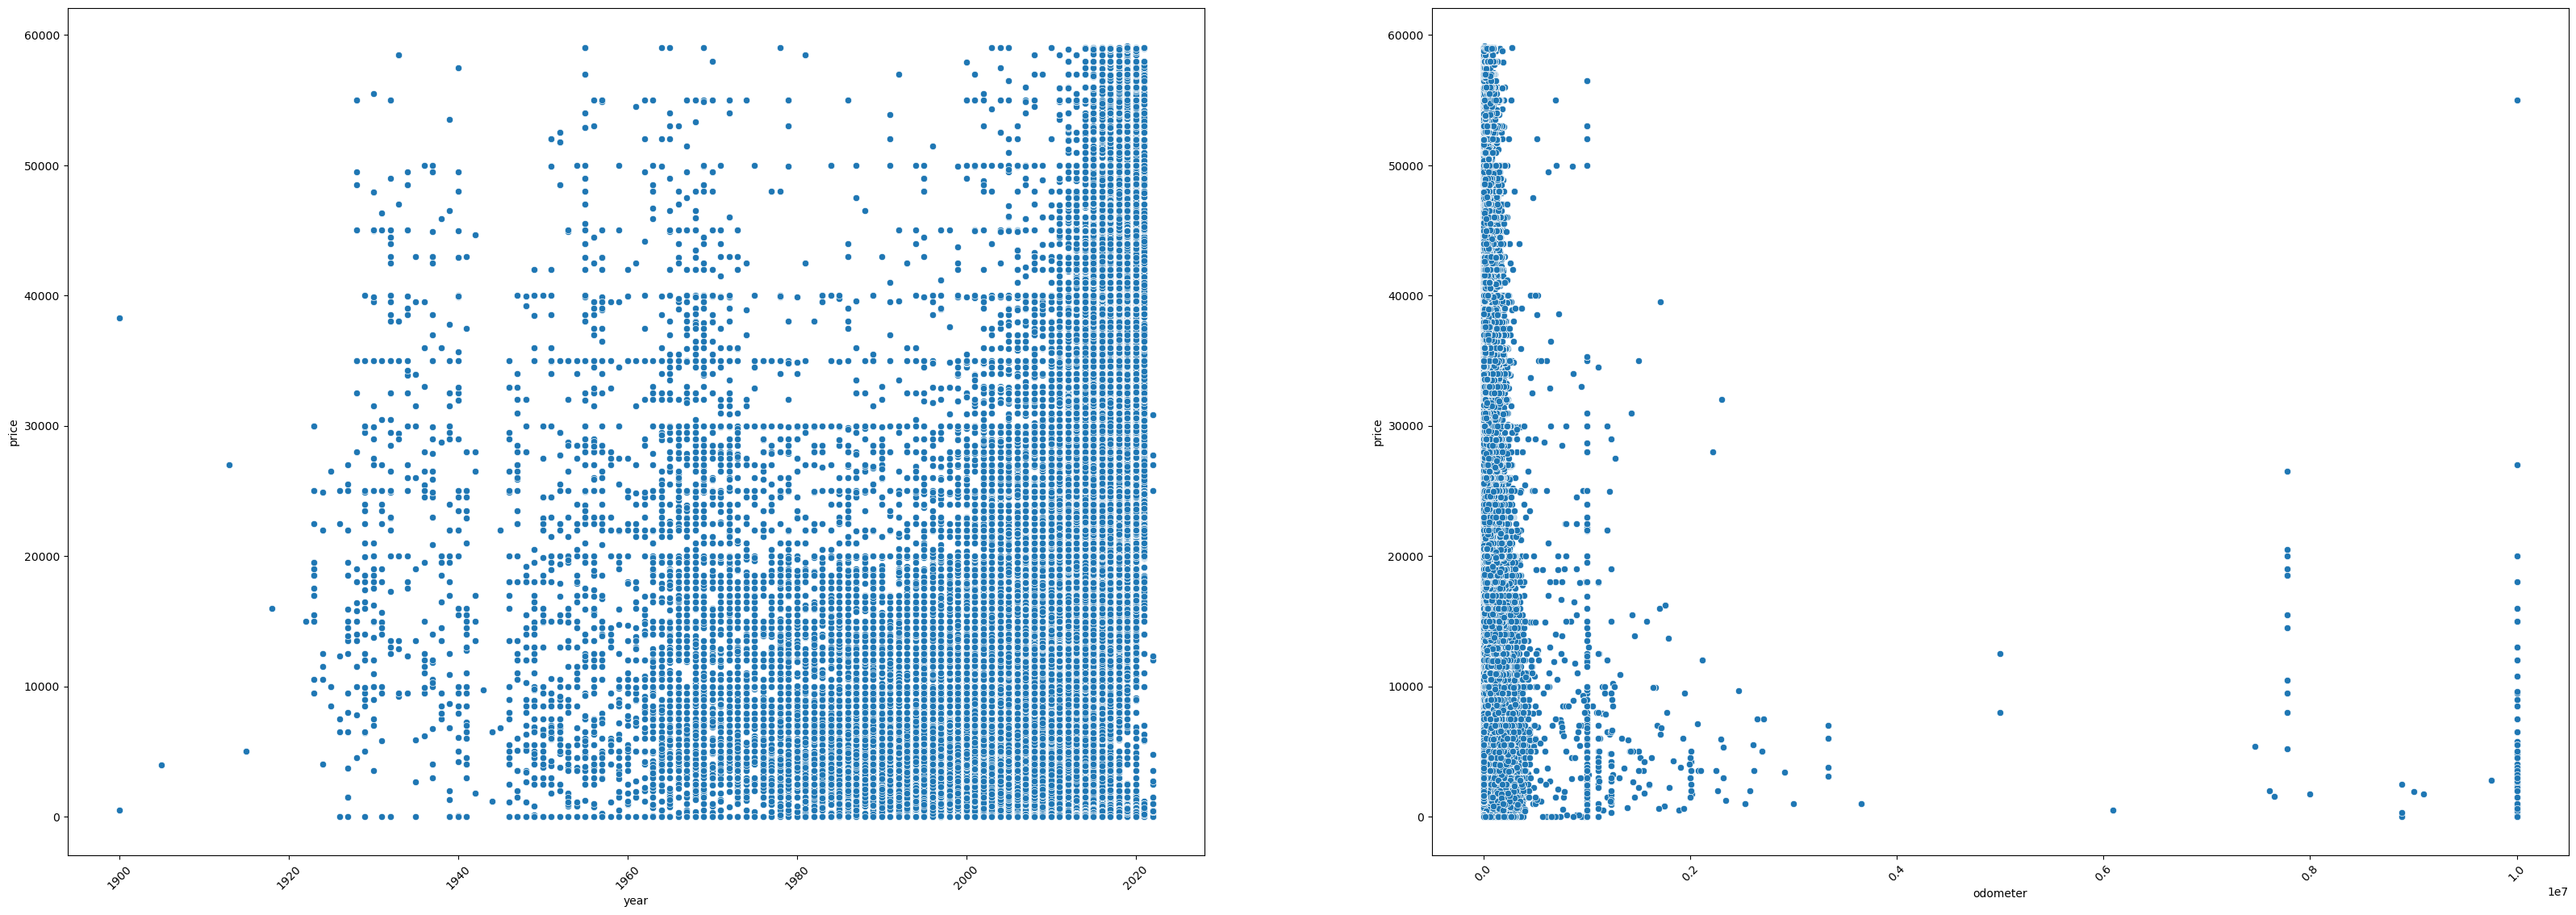

In [71]:
nrows = 2
ncols = 2
iterator= 1
plt.figure(figsize=(40,30))
for i in df.select_dtypes(include=np.number).columns[1:]:
    plt.subplot(nrows,ncols,iterator)  
    sns.scatterplot(x=df[i],y=df['price'])
    plt.xticks(rotation=45)
    iterator+=1  

plt.show()

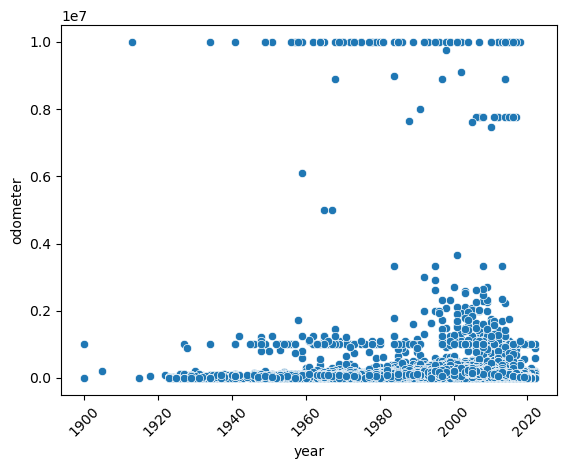

In [72]:
sns.scatterplot(x=df['year'],y=df['odometer'])
plt.xticks(rotation=45)
plt.show()

In [73]:
for i in df.select_dtypes(exclude=np.number).columns[1:]:
    print(pd.crosstab(index=df['manufacturer'],columns=df[i]))
    print('--------------------------------------------------------------------------------------')

condition        excellent  fair   good  like new   new  salvage  unknown
manufacturer                                                             
acura                  901   118   3351       151   338        4      449
alfa-romeo              37     3    709        11    58        0       39
aston-martin             2     0      2         4     0        0        3
audi                  1381    91   3398       303   505        8      744
bmw                   3243   196   5126       604  1393       10     1743
buick                 1036   122   2174       228   312       26      545
cadillac              1363   107   2588       324   377       15      719
chevrolet            11152  1236  15664      2793  4389      167     7154
chrysler              1473   135   1674       296   352       13      865
datsun                  22     7     11         2     4        1        2
dodge                 2741   309   3982       570   972      126     2117
ferrari                 10     0     1

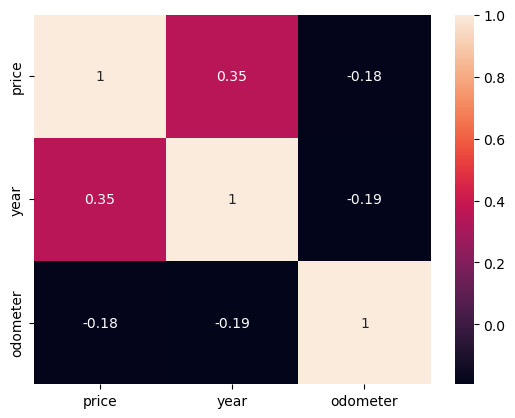

In [74]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.skew()

Unnamed: 0     0.019263
price          0.663681
year          -4.148412
odometer      53.028649
dtype: float64

In [13]:
df_copy_1=df.copy()
df_t=df.copy()

In [14]:
df.select_dtypes(include=np.number).columns[1:]

Index(['price', 'year', 'odometer'], dtype='object')

In [15]:
from sklearn.preprocessing import PowerTransformer

In [16]:
pt=PowerTransformer()
df_t[['year', 'odometer']]=pt.fit_transform(df_copy_1[['year', 'odometer']])

In [17]:
df_t.skew()

Unnamed: 0    0.019263
price         0.663681
year         -2.038005
odometer      0.290960
dtype: float64

In [18]:
df_t.shape

(260724, 13)

In [19]:
df_copy_1.shape

(260724, 13)

In [20]:
x=df_t.drop(columns=["price"],axis=1)
y=df_t.price

In [21]:
x_coded=pd.get_dummies(data=x,columns=['manufacturer', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'state'],drop_first=True)

In [22]:
x_coded.condition.unique()

array(['good', 'excellent', 'like new', 'new', 'fair', 'unknown',
       'salvage'], dtype=object)

In [23]:
x_coded.condition.replace(to_replace=['unknown','salvage','fair','good', 'excellent','like new','new'],value=[0,1,2,3,4,5,6],inplace=True)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_coded,y,test_size=0.3)

In [26]:
xtrain_copy=x_train.copy()
xtest_copy=x_test.copy()

In [27]:
ss=StandardScaler()
x_train[x.select_dtypes(include=np.number).columns]=ss.fit_transform(xtrain_copy[x.select_dtypes(include=np.number).columns])
x_test[x.select_dtypes(include=np.number).columns]=ss.transform(xtest_copy[x.select_dtypes(include=np.number).columns])

In [28]:
xtest_copy.head()

,Unnamed: 0,year,condition,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
92788,123550,-0.181838,5,-1.551923,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113970,150843,-0.023896,3,-0.266994,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16546,22954,-0.181838,3,0.894246,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115061,152119,-0.634753,4,0.490945,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158471,207815,0.302917,4,-0.019338,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# xtest.head()

In [30]:
# print(xtrain.shape)
# print(ytrain.shape)
# print(xtest.shape)
# print(ytest.shape)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(182506, 118)
(182506,)
(78218, 118)
(78218,)


In [35]:
import statsmodels.api as sm

In [36]:
xtrain_c=sm.add_constant(x_train)

In [37]:
ols=sm.OLS(y_train,xtrain_c).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2942.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:            -1.8761e+06
No. Observations:              182506   AIC:                         3.752e+06
Df Residuals:                  182387   BIC:                         3.754e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3.815e+04    657.520     58.014      0.000    3.69e+04    3.94e+04
Unnamed: 0                   -1894.4780    318.532     -5.948      0.000   -2518.794   -1270.162
year                          4549.9476     20.915    217.541      0.000    4508.954    4590.941
condition                       18.9304     10.246      1.848      0.065      -1.152      39.013
odometer                     -4988.9178     20.861   -239.150      0.000   -5029.805   -4948.031
manufacturer_alfa-romeo       -792.7167    319.911     -2.478      0.013   -1419.736    -165.698
manufacturer_aston-martin     1.748e+04   3653.474      4.784      0.000    1.03e+04    2.46e+04
manufacturer_audi             1452.5978    168.801      8.605      0.000    1121.752    1783.444
manufacturer_bmw              -717.2546    152.082     -4.716      0.000   -1015.332    -419.177
manufacturer_buick           -2751.4659    191.855    -14.341      0.000   -3127.497   -2375.435
manufacturer_cadillac         -221.0954    177.060     -1.249      0.212    -568.128     125.937
manufacturer_chevrolet       -1779.8833    136.728    -13.018      0.000   -2047.868   -1511.899
manufacturer_chrysler        -4662.6486    194.817    -23.933      0.000   -5044.485   -4280.812
manufacturer_datsun           1.184e+04   1392.391      8.506      0.000    9113.965    1.46e+04
manufacturer_dodge           -3162.6449    158.502    -19.953      0.000   -3473.304   -2851.985
manufacturer_ferrari          1.242e+04   1509.606      8.230      0.000    9464.733    1.54e+04
manufacturer_fiat            -1.069e+04    381.114    -28.058      0.000   -1.14e+04   -9946.165
manufacturer_ford            -2265.7267    135.167    -16.762      0.000   -2530.650   -2000.803
manufacturer_gmc              -724.7330    152.252     -4.760      0.000   -1023.143    -426.323
manufacturer_harley-davidson -1.115e+04    960.503    -11.608      0.000    -1.3e+04   -9266.965
manufacturer_honda           -2640.6151    148.056    -17.835      0.000   -2930.802   -2350.428
manufacturer_hyundai         -5583.1468    166.048    -33.624      0.000   -5908.596   -5257.697
manufacturer_infiniti        -1824.6369    187.135     -9.750      0.000   -2191.417   -1457.857
manufacturer_jaguar            878.0647    247.656      3.545      0.000     392.664    1363.466
manufacturer_jeep            -1435.7041    149.336     -9.614      0.000   -1728.400   -1143.008
manufacturer_kia             -6305.9240    172.697    -36.514      0.000   -6644.405   -5967.443
manufacturer_land rover       6075.5778   2497.332      2.433      0.015    1180.864     1.1e+04
manufacturer_lexus            1631.3752    166.149      9.819      0.000    1305.727    1957.023
manufacturer_lincoln          -187.5265    197.140     -0.951      0.341    

In [ ]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(ols.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [38]:
xtest_c=sm.add_constant(x_test)

In [39]:
ypred_ols=ols.predict(xtest_c)

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
mse=mean_squared_error(y_test,ypred_ols)
meap=mean_absolute_percentage_error(y_test,ypred_ols)
print("MSE",mse,"RMSE",mse**0.5,"meap",meap)

MSE 50480591.938795395 RMSE 7104.969524128544 meap 0.3246683728283209


### MULTICOLINEARITY CHECK

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [332]:
vf=[VIF(x_train.values,i) for i in range(x_train.shape[1])]
vf_df=pd.DataFrame(vf,index=x_train.columns,columns=["VIF"])
vf_df.sort_values(by="VIF",ascending=False)

,VIF
fuel_gas,15.820730
manufacturer_ford,8.744052
state_ca,7.925129
manufacturer_chevrolet,6.945728
state_fl,5.055188
...,...
manufacturer_datsun,1.010938
manufacturer_morgan,1.007158
manufacturer_ferrari,1.006075
manufacturer_land rover,1.002255


In [104]:
x_train_new=x_train.drop(columns="cylinders_other",axis=1)

In [105]:
vf=[VIF(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vf_df=pd.DataFrame(vf,index=x_train_new.columns,columns=["VIF"])
vf_df.sort_values(by="VIF",ascending=False)

,VIF
fuel_gas,16.620421
manufacturer_ford,9.447762
state_ca,8.303344
manufacturer_chevrolet,7.502166
manufacturer_toyota,5.199384
...,...
manufacturer_morgan,1.005959
manufacturer_land rover,1.003744
title_status_parts only,1.001881
cylinders_7 cylinders,1.000432


In [106]:
x_train_new=x_train_new.drop(columns="fuel_gas",axis=1)

In [107]:
vf=[VIF(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vf_df=pd.DataFrame(vf,index=x_train_new.columns,columns=["VIF"])
vf_df.sort_values(by="VIF",ascending=False)

,VIF
manufacturer_ford,9.292171
state_ca,7.458781
manufacturer_chevrolet,7.305822
manufacturer_toyota,5.036908
condition,4.733191
...,...
manufacturer_morgan,1.005770
manufacturer_land rover,1.003638
title_status_parts only,1.001881
cylinders_7 cylinders,1.000427


In [108]:
x_test_new=x_test[x_train_new.columns]

In [109]:
xtrain_new_c=sm.add_constant(x_train_new)

In [111]:
ols=sm.OLS(y_train,xtrain_new_c).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1642.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:26:33   Log-Likelihood:            -2.4168e+06
No. Observations:              228036   AIC:                         4.834e+06
Df Residuals:                  227914   BIC:                         4.835e+06
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.447e+04    319.417     76.617      0.000    2.38e+04    2.51e+04
year                          4286.7422     25.937    165.274      0.000    4235.906    4337.579
condition                       66.3764     12.340      5.379      0.000      42.191      90.562
odometer                     -3142.9173     25.229   -124.574      0.000   -3192.366   -3093.469
manufacturer_alfa-romeo       -309.9468    430.324     -0.720      0.471   -1153.371     533.477
manufacturer_aston-martin     1523.0115   3158.138      0.482      0.630   -4666.858    7712.881
manufacturer_audi             1382.3747    217.149      6.366      0.000     956.768    1807.982
manufacturer_bmw             -1247.6485    194.984     -6.399      0.000   -1629.812    -865.485
manufacturer_buick           -2947.2962    236.452    -12.465      0.000   -3410.736   -2483.856
manufacturer_cadillac         -688.7359    224.959     -3.062      0.002   -1129.650    -247.822
manufacturer_chevrolet       -2700.4652    174.427    -15.482      0.000   -3042.337   -2358.593
manufacturer_chrysler        -5093.9093    233.586    -21.807      0.000   -5551.731   -4636.088
manufacturer_datsun           8021.9131   1509.725      5.313      0.000    5062.892     1.1e+04
manufacturer_dodge           -4624.1124    198.077    -23.345      0.000   -5012.339   -4235.886
manufacturer_ferrari         -2599.7082   1752.055     -1.484      0.138   -6033.691     834.275
manufacturer_fiat            -9413.9752    481.804    -19.539      0.000   -1.04e+04   -8469.652
manufacturer_ford            -2553.2037    172.629    -14.790      0.000   -2891.552   -2214.855
manufacturer_gmc             -1664.8225    194.506     -8.559      0.000   -2046.049   -1283.596
manufacturer_harley-davidson -9915.6680   1295.998     -7.651      0.000   -1.25e+04   -7375.544
manufacturer_honda           -3075.4817    186.092    -16.527      0.000   -3440.217   -2710.746
manufacturer_hyundai         -5510.9230    207.930    -26.504      0.000   -5918.461   -5103.385
manufacturer_infiniti        -1680.7495    241.240     -6.967      0.000   -2153.574   -1207.925
manufacturer_jaguar           2220.2778    319.124      6.957      0.000    1594.802    2845.754
manufacturer_jeep            -1746.8216    189.851     -9.201      0.000   -2118.926   -1374.718
manufacturer_kia             -6419.6700    216.720    -29.622      0.000   -6844.435   -5994.905
manufacturer_land rover      -8352.4900   2509.947     -3.328      0.001   -1.33e+04   -3433.058
manufacturer_lexus            1091.6477    214.470      5.090      0.000     671.291    1512.004
manufacturer_lincoln          -246.1748    252.900     -0.973      0.330    -741.852     249.502
manufacturer_mazda           -5503.1323    239.546    -22.973      0.000   -

In [46]:
ypred_train=ols.predict(xtrain_c)

In [112]:
def print_metrics(y_test,y_pred,model):
    print("metrics for the model",model)
    print(" ")
    print('MSE',mean_squared_error(y_test,y_pred))
    print(" ")
    print("RMES",(mean_squared_error(y_test,y_pred))**0.5)
    print(" ")
    print("MAPE",mean_absolute_percentage_error(y_test,y_pred))

In [42]:
clf={
    "descison tree":DecisionTreeRegressor(),
    "random forest":RandomForestRegressor(),
    "lr": LinearRegression(),
    "sgd":SGDRegressor(),
   "ada boosting":AdaBoostRegressor(),
    "xg boosting":XGBRegressor(),
    "svm": SVR(),
    "gradiet boost":GradientBoostingRegressor()
}

model_reports=pd.DataFrame(columns=['model','mse','rmse','mape'])
for clf,clf_name in zip(clf.values(),clf.keys()):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("fitting the model...",clf_name)
    t={"model":clf_name,
       "mse":mean_squared_error(y_test,y_pred),
       'rmse':(mean_squared_error(y_test,y_pred))**0.5,
       "mape":mean_absolute_percentage_error(y_test,y_pred)}
    model_reports=model_reports.append(t,ignore_index=True)
model_reports.sort_values(by='rmse',ascending=True,inplace=True)
model_reports

fitting the model... descison tree
fitting the model... random forest
fitting the model... lr
fitting the model... sgd
fitting the model... ada boosting
fitting the model... xg boosting
fitting the model... svm
fitting the model... gradiet boost


,model,mse,rmse,mape
1,random forest,1.483615e+07,3851.772742,0.142075
5,xg boosting,2.258848e+07,4752.734346,0.193453
0,descison tree,2.684721e+07,5181.429469,0.171587
7,gradiet boost,3.656740e+07,6047.098638,0.254931
2,lr,5.048059e+07,7104.969524,0.324668
3,sgd,5.073885e+07,7123.120854,0.330584
4,ada boosting,6.948903e+07,8336.008035,0.528656
6,svm,9.538780e+07,9766.667874,0.430891


In [114]:
# state_drop=[]
# for i in x_train_new.columns:
#     if "state" in i:
#         state_drop.append(i)
        

In [49]:
import time
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [52]:
 time.time()

1680411533.2158172

In [44]:
rt_grid=RandomForestRegressor()

In [68]:
cv.best_score_

0.5964903148343883

In [64]:
param_rand={
    'n_estimators':[0,30,50,75,100],
    'min_samples_leaf':range(1,10),
    'min_samples_split':range(2,20,2),
    'max_depth':range(2,26,2)}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
rad_cv=RandomizedSearchCV(estimator=rt_grid,param_distributions=param_rand,scoring="r2")
rad_cv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(2, 26, 2),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 20, 2),
                                        'n_estimators': [0, 30, 50, 75, 100]},
                   scoring='r2')

In [66]:
rad_cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 24}

In [67]:
rad_cv.best_score_

0.8755108714621411

In [79]:
start_time = time.time()
print(start_time)

param_grid={
    'n_estimators':[40,50,60,70],
    'min_samples_leaf':range(2,5),
    'min_samples_split':range(4,11,2),
    'max_depth':[22,23,24,25,26]
}
cv=GridSearchCV(estimator=rt_grid,param_grid=param_grid,cv=5,n_jobs=4,
               return_train_score=False,scoring='neg_root_mean_squared_error')
cv.fit(x_train,y_train) 
print("--- %s seconds ---" % (time.time() - start_time))

1680434695.3671782
--- 40371.893117666245 seconds ---


In [80]:
cv.best_params_

{'max_depth': 26,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 70}

In [54]:
cv.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [32]:
rt_final=RandomForestRegressor(n_estimators=70,max_depth=26,min_samples_split=4,min_samples_leaf=2)
rt_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=26, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=70)

In [33]:
y_pred=rt_final.predict(x_test)

In [34]:
(mean_squared_error(y_test,y_pred))**0.5

4015.673803409224

In [37]:
rt_base=RandomForestRegressor()
rt_base.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.8877803593703716